In [2]:
import numpy as np
import utilities as utl
from sympy import symbols, Eq, solve
import math

In [4]:
# Definir las reacciones
reactions = [
    (np.array([['C(s)', 1], ['CO2(g)', 1]]), np.array([['CO(g)', 2]])),  # Reacción 1: C + CO2 -> 2 CO
    (np.array([['C(s)', 1], ['H2O(g)', 1]]), np.array([['CO(g)', 1], ['H2(g)', 1]])),  # Reacción 2: C + H2O -> CO + H2
    (np.array([['C(s)', 1], ['H2(g)', 2]]), np.array([['CH4 (g, methane)', 1]]))  # Reacción 3: C + 2H2 -> CH4
]

# Calcular y mostrar propiedades estándar para cada reacción
for i, (reactants, products) in enumerate(reactions, start=1):
    dG_f0, dH_f0, dS0, vi, K_y, r_298K, p_298K = utl.standard_properties(reactants, products)
    
    print(f"\nReacción {i}:")
    print(f"dG_f0: {dG_f0}")
    print(f"dH_f0: {dH_f0}")
    print(f"dS0: {dS0}")
    print(f"vi: {vi}")
    print(f"K_y: {K_y}")
    print(f"r_298K: {r_298K}")
    print(f"p_298K: {p_298K}")


Reactant Properties:
    Species  DHf°[kJ/mol]  S°[J/K·mol]  DGf°[kJ/mol]  Coefficient  \
63  CO2(g)      -393.509       213.74      -394.359          1.0   

    Weighted_DHf  Weighted_DGf  Weighted_S      n [mol]  \
63      -393.509      -394.359      213.74  1.0 - 1.0*x   

                            y_i  
63  (1.0 - 1.0*x)/(1.0*x + 1.0)   

Product Properties:
    Species  DHf°[kJ/mol]  S°[J/K·mol]  DGf°[kJ/mol]  Coefficient  \
62   CO(g)      -110.525      197.674      -137.168          2.0   

    Weighted_DHf  Weighted_DGf  Weighted_S n [mol]                  y_i  
62       -221.05      -274.336     395.348   2.0*x  2.0*x/(1.0*x + 1.0)   

ΔG°: 120.02299999999997 kJ/mol, non-spontaneous.
ΔH°: 172.459 kJ/mol, endothermic.
ΔS°: 0.1758712057689084 kJ/(K·mol), increased disorder.
ln(K_a): -48.41942681497007
K_a: 9.369364123234635e-22
K_y: 0.25*((1.0 - 1.0*x)/(1.0*x + 1.0))**1.0/(x/(1.0*x + 1.0))**2.0
Net Stoichiometric Coefficient (v_i): 1.0
Total number of moles (n_t): 1.0*x + 1.0

In [6]:
reactants = np.array([["N2(g)", 1], ["H2(g)", 3]])
products = np.array([["NH3(g)",2]])

In [7]:
dG_f0, dH_f0, dS0, vi, K_y, r_298K, p_298K = utl.standard_properties(reactants, products)

Reactant Properties:
     Species  DHf°[kJ/mol]  S°[J/K·mol]  DGf°[kJ/mol]  Coefficient  \
86    H2(g)           0.0      130.684           0.0          3.0   
126   N2(g)           0.0      191.610           0.0          1.0   

     Weighted_DHf  Weighted_DGf  Weighted_S      n [mol]  \
86            0.0           0.0     392.052  3.0 - 3.0*x   
126           0.0           0.0     191.610  1.0 - 1.0*x   

                             y_i  
86   (3.0 - 3.0*x)/(4.0 - 2.0*x)  
126  (1.0 - 1.0*x)/(4.0 - 2.0*x)   

Product Properties:
     Species  DHf°[kJ/mol]  S°[J/K·mol]  DGf°[kJ/mol]  Coefficient  \
128  NH3(g)        -46.11       192.45        -16.45          2.0   

     Weighted_DHf  Weighted_DGf  Weighted_S n [mol]                  y_i  
128        -92.22         -32.9       384.9   2.0*x  2.0*x/(4.0 - 2.0*x)   

ΔG°: -32.9 kJ/mol, spontaneous.
ΔH°: -92.22 kJ/mol, exothermic.
ΔS°: -0.19896025490524905 kJ/(K·mol), decreased disorder.
ln(K_a): 13.272448965719203
K_a: 580966.84320941

    Temperature (K)  ΔG° (kJ/mol)    ln(K_a)           K_a  \
0        200.000000    -52.427949  31.529919  4.934802e+13   
1        233.333333    -45.795941  23.606966  1.788031e+10   
2        266.666667    -39.163932  17.664752  4.695741e+07   
3        298.150000    -32.900000  13.272449  5.809668e+05   
4        300.000000    -32.531924  13.043029  4.618656e+05   
5        333.333333    -25.899915   9.345651  1.144893e+04   
6        366.666667    -19.267907   6.320524  5.558642e+02   
7        400.000000    -12.635898   3.799584  4.468261e+01   
8        433.333333     -6.003890   1.666482  5.293511e+00   
9        466.666667      0.628119  -0.161892  8.505331e-01   
10       500.000000      7.260127  -1.746482  1.743863e-01   

                       X  
0    9.24606527234790e-8  
1    4.85736976641557e-6  
2    9.47715696893287e-5  
3   0.000851062644188068  
4   0.000954359555362268  
5    0.00601557146452480  
6     0.0264605492450984  
7     0.0849669277128606  
8      0.200

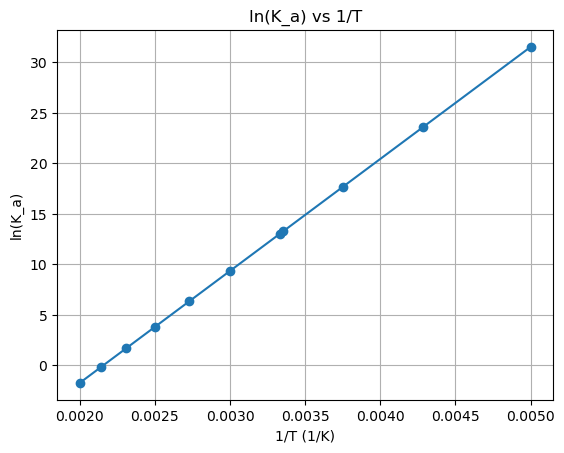

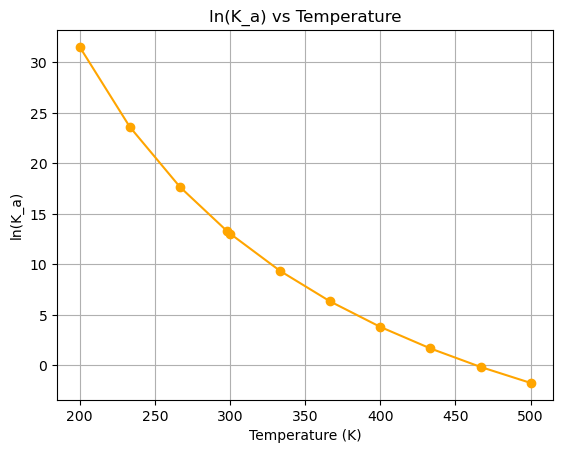

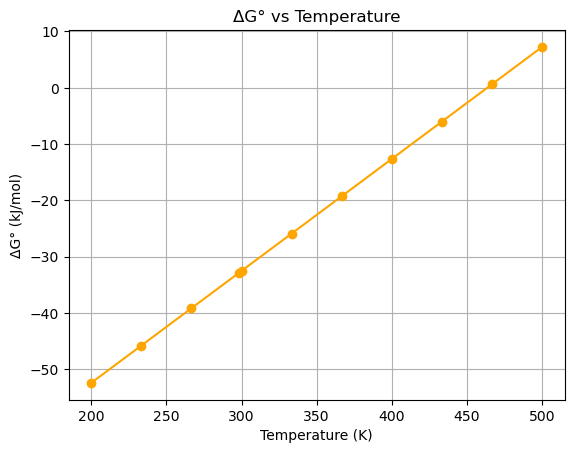

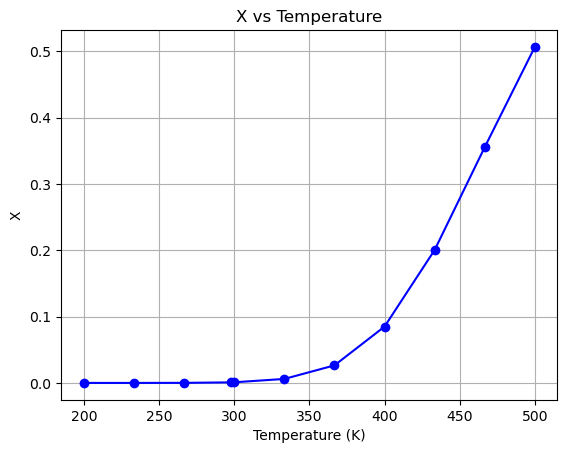

In [8]:
temperatures = np.linspace(200, 500, num=10)
temperatures = np.sort(np.append(temperatures, 298.15))

results = utl.properties_temperature(temperatures, dH_f0, dS0, K_y=K_y)
utl.graphs_T(results)

